<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование площади, цены, числа комнат, высоты потолков</a></span></li><li><span><a href="#Изучение-время-продажи-квартиры" data-toc-modified-id="Изучение-время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение время продажи квартиры</a></span></li><li><span><a href="#Редкие-или-выбивающиеся-значения" data-toc-modified-id="Редкие-или-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Редкие или выбивающиеся значения</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Анализ-десяти-населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населенных-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ десяти населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удаленности-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удаленности-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ изменения цены по степени удаленности от центра</a></span></li><li><span><a href="#Анализ-квартир-в-центре" data-toc-modified-id="Анализ-квартир-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


server_path = '/datasets/real_estate_data.csv'
filename = 'real_estate_data.csv'

try:
    data = pd.read_csv(filename, sep='\t') 
except: 
    data = pd.read_csv(server_path, sep='\t') 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

### Обработка пропусков

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски присутствуют в 14 столбцах из 22. Необходимо понять, где наличие пропусков критично и их необходимо устранить, а где можно оставить или заменить нереалистичными значениями (чтобы отсечь при построении графиков для работы только с достоверными данными), поскольку они либо не влияют на результаты исследования, либо сами из себя представляют важную информацию.  

Начнем с высоты потолков. Эти данные пригодятся нам в дальнейшем исследовании. Пропуски составляют почти 39% от всей информации, но замена средним значением повлечет искажение результатов, поэтому можно заменить их маркерами и отсечь при построении гистограмм и анализе параметров. 

Визуальная оценка датасета позволяет сделать вывод, что для начала необходимо привести данные к единому образцу, поскольку встречаются некорректные значения (например, 25 метров). Максимальная высота потолков в Петербурге неизвестна, но на некоторых форумах пишут о 5 метрах в сталинках. Однако встречаются и элитные жк, где потолки могут достигать 10 метров. Чтобы не удалить лишнего, введем функцию, приводящую все значения больше 20 к десятичной дроби с одной цифрой до точки. 

In [5]:
def ceiling(height): 
    if height >= 20: 
        height = height/10
    return height
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(777)
data['ceiling_height'].isnull().sum()

0

Пропуски в столбе *is_apartment*, вероятнее всего указывают на то, что квартира находится в собственности и не является апартаментами. Заменим отсутствующие значения на "False" и представим столбец как булев массив, заменив тип данных на *bool*.

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool')
data['is_apartment'].unique()

array([ True, False])

Наличие балкона не является важной величиной для исследования. Пропуски в столбце указывают скорей всего на то, что балкона в квартире нет, заменим их на 0. Также заменим тип данных на целочисленный. 

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

Перейдем к работе с пропусками в столбце с жилой площадью и площадью кухни. Попробуем высчитать медианное отношение (коэффициент) жилой площади и площади кухни к общей, сгруппируя по комнатам. 

In [10]:
rooms_grouped = data.groupby('rooms').median()
rooms_grouped['living_median'] = rooms_grouped['living_area'] / rooms_grouped['total_area'] 
rooms_grouped['kitchen_median'] = rooms_grouped['kitchen_area'] / rooms_grouped['total_area']
rooms_grouped

,total_images,last_price,total_area,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_median,kitchen_median
rooms,,,,,,,,,,,,,,,,,,,,,
0,7.0,2700000.0,26.05,777.000,17.0,18.000,7.0,True,True,False,...,1,21460.0,13595.5,0.0,535.0,1.0,528.0,50.0,0.690979,NaN
1,9.0,3600000.0,36.56,2.800,11.0,17.600,5.0,True,False,False,...,0,29305.0,14265.0,0.0,455.0,0.0,511.0,81.0,0.481400,0.247265
2,10.0,4770169.0,53.00,2.850,9.0,30.500,4.0,True,False,False,...,0,26938.0,13060.0,0.0,460.0,0.0,502.5,91.0,0.575472,0.166038
3,10.0,6200000.0,73.00,2.965,9.0,45.000,4.0,True,False,False,...,0,26402.0,12682.0,0.0,458.0,1.0,505.0,114.0,0.616438,0.130137
4,11.0,9000000.0,99.30,3.100,6.0,63.600,4.0,True,False,False,...,0,24710.0,8447.0,1.0,437.0,1.0,456.5,156.0,0.640483,0.111782
5,10.5,14000000.0,146.45,3.400,5.0,91.785,4.0,True,False,False,...,0,24306.0,4750.0,1.0,392.0,1.0,486.0,185.5,0.626733,0.103107
6,11.0,19000000.0,184.30,3.400,5.0,123.900,3.0,True,False,False,...,0,24239.0,4751.0,1.0,390.0,1.0,413.0,201.5,0.672273,0.105806
7,11.0,24900000.0,214.00,3.500,5.0,145.000,4.0,True,False,False,...,0,24336.0,4719.0,1.0,440.0,1.0,392.0,138.0,0.677570,0.093458
8,7.5,23095000.0,235.70,390.500,5.5,161.000,3.0,True,False,False,...,0,24261.5,4659.0,1.5,537.0,1.5,390.5,249.0,0.683072,0.106067


Посмотрим, в данных о квартирах с каким количеством комнат присутствуют пропуски.

In [11]:
living_nan = pd.isnull(data['living_area'])
data[living_nan]['rooms'].unique()

array([3, 2, 1, 4, 7, 0, 5, 6, 9], dtype=int64)

In [12]:
kitchen_nan = pd.isnull(data['kitchen_area'])
data[kitchen_nan]['rooms'].unique()

array([3, 1, 2, 0, 4, 7, 5, 6, 8, 9], dtype=int64)

Заменим пропуски на маркеры и введем функцию, заменяющую их на расчеты по формуле *общая площадь * коэффициент*, применяя индексацию к сгруппированным данным по комнатам.

In [13]:
data['living_area'] = data['living_area'].fillna(77777)
data['living_area'].isnull().sum()

0

In [14]:
def area_living(row): 
    if (row['living_area'] == 77777) and (row['rooms'] == 1):
        row['living_area'] = rooms_grouped.loc[1, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 2):
        row['living_area'] = rooms_grouped.loc[2, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 3):
        row['living_area'] = rooms_grouped.loc[3, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 4):
        row['living_area'] = rooms_grouped.loc[4, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 5):
        row['living_area'] = rooms_grouped.loc[5, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 6):
        row['living_area'] = rooms_grouped.loc[6, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 7):
        row['living_area'] = rooms_grouped.loc[7, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 9): # в квартирах с 8 комнатами нет пропусков
        row['living_area'] = rooms_grouped.loc[9, 'living_median'] * row['total_area']
    if (row['living_area'] == 77777) and (row['rooms'] == 0):
        row['living_area'] = rooms_grouped.loc[0, 'living_median'] * row['total_area']
    return row

data = data.apply(area_living, axis=1)

Проделаем ту же операцию с пропусками в площади кухни (здесь в квартирах с 8 комнатами пропуски есть, поэтому считаем по порядку)

In [15]:
data['kitchen_area'] = data['kitchen_area'].fillna(88888)

In [16]:
def area_kitchen(row):
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 1):
        row['kitchen_area'] = rooms_grouped.loc[1, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 2):
        row['kitchen_area'] = rooms_grouped.loc[2, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 3):
        row['kitchen_area'] = rooms_grouped.loc[3, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 4):
        row['kitchen_area'] = rooms_grouped.loc[4, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 5):
        row['kitchen_area'] = rooms_grouped.loc[5, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 6):
        row['kitchen_area'] = rooms_grouped.loc[6, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 7):
        row['kitchen_area'] = rooms_grouped.loc[7, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 8):
        row['kitchen_area'] = rooms_grouped.loc[8, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 9):
        row['kitchen_area'] = rooms_grouped.loc[9, 'kitchen_median'] * row['total_area']
    if (row['kitchen_area'] == 88888) and (row['rooms'] == 0):
        row['kitchen_area'] = 0
    return row

data = data.apply(area_kitchen, axis=1)

In [17]:
data.loc[3]

total_images                              0
last_price                       64900000.0
total_area                            159.0
first_day_exposition    2015-07-24T00:00:00
rooms                                     3
ceiling_height                        777.0
floors_total                           14.0
living_area                       98.013699
floor                                     9
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                      20.691781
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                       424.0
Name: 3, dtype: object

Вывод контрольной строки позволяет увидеть, как пропуски жилой площади и площади кухни в данных о трехкомнатной квартире изменились в соответствии с имеющейся общей площадью.

Название населенного пункта отсутствует всего в 49 строках, их необходимо удалить. 

In [18]:
data.dropna(subset = ['locality_name'], inplace=True)

In [19]:
data['locality_name'].isnull().sum()

0

Теперь приведем данные о локации к единому образцу: уберем из названий виды населенных пунктов (поселок, село) и, на всякий случай, переведем все слова в нижний регистр. 

Проверим, изменится ли количество наименований подсчетом уникальных значений.

In [20]:
len(data['locality_name'].unique())

364

In [21]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

330

In [22]:
data['locality_name'] = data['locality_name'].str.replace('поселок ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городского типа ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня ','', regex=True)

len(data['locality_name'].unique())

310

Проверим, какие еще типы населенных пунктов представлены в датасете. 

In [23]:
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара', 'ильичев

In [24]:
data['locality_name'] = data['locality_name'].str.replace('станции ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('товарищество ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое ','', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое ','', regex=True)

len(data['locality_name'].unique())

305

In [25]:
data['locality_name'].value_counts().head(15)

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
петергоф             201
сестрорецк           183
красное село         178
новое девяткино      144
сертолово            142
Name: locality_name, dtype: int64

Количество уникальных значений уменьшилось на 59, строки, где был один и тот же населенный пункт, написанный по-разному, приведены в норму. 

Пропуски в столбце о том, сколько времени висела публикация, скорей всего говорят о том, что квартира все еще не снята с сайта и объявление действительно. Заменим их на маркер, который позволит отсечь эти значения в последующих операциях и изменим тип данных на целочисленный, поскольку встречаются значения вроде 100.0000001. 

In [26]:
data['days_exposition'] = data['days_exposition'].fillna(99999).astype('int')

В данных об отдаленности от центра можно попытаться заполнить некоторые пустые строки, опираясь на название населенного пункта.

In [27]:
center = data.groupby('locality_name')['cityCenters_nearest'].mean().sort_values(ascending=False)
center.head(30)

locality_name
молодежное         65529.200000
зеленогорск        54617.583333
ломоносов          50739.969697
кронштадт          49195.726316
репино             43392.250000
белоостров         38868.000000
саперный           35854.666667
петергоф           35468.925373
сестрорецк         34624.480874
щеглово            34085.000000
павловск           33206.921053
понтонный          32293.450000
колпино            32113.771513
красное село       30020.284091
пушкин             28745.375000
усть-ижора         28222.500000
лисий нос          27613.333333
металлострой       27561.348485
александровская    27468.000000
петро-славянка     27165.000000
песочный           26475.250000
левашово           25727.000000
шушары             24243.387615
стрельна           23376.113636
мурино             21888.000000
парголово          19924.776758
санкт-петербург    11601.291571
агалатово                   NaN
алексеевка                  NaN
аннино                      NaN
Name: cityCenters_nearest,

In [28]:
spb = data.query('locality_name == "санкт-петербург"')
spb['cityCenters_nearest'].isnull().sum()

61

In [29]:
nan = data.loc[data['cityCenters_nearest'].isna() & data['airports_nearest'].isna()]
nan.query('locality_name == "санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,777.0,10.0,32.735230,6,True,...,16.814004,0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
593,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.6,16.0,19.800000,10,True,...,10.100000,2,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
604,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.0,5.0,62.000000,3,True,...,15.000000,0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,777.0,9.0,84.000000,8,True,...,20.952055,0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,402
795,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.4,5.0,36.600000,2,True,...,12.500000,0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000.0,34.30,2019-03-04T00:00:00,1,777.0,9.0,17.500000,3,True,...,8.900000,1,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
21881,15,44500000.0,169.00,2019-02-28T00:00:00,3,3.3,9.0,101.000000,7,True,...,18.000000,4,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999
21955,19,130000000.0,431.00,2017-10-02T00:00:00,7,3.7,8.0,220.000000,5,True,...,20.000000,5,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,161
22554,5,3415000.0,31.65,2019-04-16T00:00:00,1,777.0,24.0,15.236324,14,True,...,8.700000,2,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,99999


Во всех строках по Санкт-Петербургу, где присутствуют пропуски в значениях об удаленности от центра, также в наличии пропуски по отдаленности от аэропорта, поэтому по этой категории мы не сможем заполнить недостающие значения.

Так как пропусков всего 61, заменим их на среднее значение из *center*, чтобы в городской черте у нас не было пропущенных значений для дальнейшего анализа. 

In [30]:
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'] = \
    data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'].fillna(11601)

In [31]:
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'].isnull().sum()

0

На всякий случай проверим максимальное значение, чтобы удостовериться, что пропуски заполены правильно. 

In [32]:
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'].max()

29493.0

Попытаемся проверить только те населенные пункты, где количество объявлений превышает 400. Так, например, таблица содержит 590 строк с локацией "мурино", из них только две имеют значения (одинаковые) в параметре *cityCenters_nearest*. Мы можем заменить пропуски в остальных строках числом *21888*.

In [33]:
murino = data.query('locality_name == "мурино"')
murino['cityCenters_nearest'].value_counts()

21888.0    2
Name: cityCenters_nearest, dtype: int64

In [34]:
data.loc[data['locality_name'] == 'мурино', 'cityCenters_nearest'] = 21888
data.loc[8]

total_images                             20
last_price                        2900000.0
total_area                            33.16
first_day_exposition    2018-05-23T00:00:00
rooms                                     1
ceiling_height                        777.0
floors_total                           27.0
living_area                           15.43
floor                                    26
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           8.81
balcony                                   0
locality_name                        мурино
airports_nearest                        NaN
cityCenters_nearest                 21888.0
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                         189
Name: 8, dtype: object

In [35]:
kudrovo = data.query('locality_name == "кудрово"')
kudrovo['cityCenters_nearest'].unique()

array([nan])

Данные о Кудрово нам назменить нечем. 

Удаленность от центра Спб до квартир в Шушарах варьируется от 16 км до 32 км. Пропуски можно заполнить средним из *center* выше.

In [36]:
shushari = data.query('locality_name == "шушары"')
shushari['cityCenters_nearest'].unique()

array([18603., 18883., 18217., 30245., 24272., 30317., 17763., 17411.,
       31151., 23844., 17790., 17891., 29236., 24211., 29936., 18105.,
       18203.,    nan, 18626., 29846., 19694., 29006., 19247., 30899.,
       29237., 29601., 30999., 19717., 18465., 17642., 30296., 17725.,
       18044., 17231., 24148., 29646., 23688., 17424., 30523., 31582.,
       24920., 24838., 30252., 29377., 24055., 28985., 29448., 17916.,
       31262., 23689., 30519., 31429., 29604., 31370., 30368., 29672.,
       29754., 19265., 31092., 30142., 24165., 24456., 18791., 30458.,
       30765., 31357., 29713., 31491., 18312., 23553., 28984., 30200.,
       24213., 19242., 31455., 24586., 24885., 31150., 31021., 18251.,
       24344., 30724., 17017., 17440., 30962., 28963., 31095., 17829.,
       29837., 30912., 29272., 30563., 18434., 24775., 29367., 29582.,
       18699., 18011., 30604., 31295., 29378., 30800., 29176., 17778.,
       27574., 30836., 30997., 31459., 18520., 29401., 30593., 29368.,
      

In [37]:
data.loc[data['locality_name'] == 'шушары', 'cityCenters_nearest'] = \
    data.loc[data['locality_name'] == 'шушары', 'cityCenters_nearest'].fillna(24243)

In [38]:
data.loc[data['locality_name'] == 'шушары', 'cityCenters_nearest'].max()

32079.0

In [39]:
data.loc[data['locality_name'] == 'шушары', 'cityCenters_nearest'].isnull().sum()

0

Остальные заменим нереалистичным маркером. 

In [40]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(5555555)

Выведем рандомную контрольную строку. 

In [41]:
data.loc[28]

total_images                              8
last_price                        4170000.0
total_area                             44.0
first_day_exposition    2017-12-13T00:00:00
rooms                                     1
ceiling_height                          2.9
floors_total                            6.0
living_area                            20.8
floor                                     1
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           11.7
balcony                                   1
locality_name                        пушкин
airports_nearest                    18557.0
cityCenters_nearest                 30710.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        1.0
ponds_nearest                         118.0
days_exposition                          74
Name: 28, dtype: object

Данные об общей этажности зданий отсутствуют в 86 строках, которые можно удалить.

In [42]:
data.dropna(subset = ['floors_total'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Близость к аэропорту, парку или наличие пруда рядом не являются важными для анализа категориями, поэтому их можно оставить без изменений или заменить на нулевые (касательно парков и прудов) или по локации (относительно аэропортов).

На всякий случай проверим, нет ли дублирующихся строк. 

In [43]:
data.duplicated().sum()

0

### Замена типов данных

Мы уже заменили некоторые значения на более удобные в плане расчетов: количество балконов и длительность размещения объявления привели к целочисленным. 

In [44]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,99999
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,777.00,11.0,18.600000,1,True,...,11.000000,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,777.00,5.0,34.300000,4,True,...,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,777.00,14.0,98.013699,9,True,...,20.691781,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Также заменим данные об общей этажности зданий, цене, общей и жилой площади, площади кухни и расположенности от центра на целочисленный тип для удобства вычислений, расчета стоимости квадратного метра и для того, чтобы нивелировать последствия заполенения пропусков. 

In [45]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')
data['living_area'] = data['living_area'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

data.loc[3]

total_images                              0
last_price                         64900000
total_area                              159
first_day_exposition    2015-07-24T00:00:00
rooms                                     3
ceiling_height                        777.0
floors_total                             14
living_area                              98
floor                                     9
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                             20
balcony                                   0
locality_name               санкт-петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                         424
Name: 3, dtype: object

К строковым значениям в столбце с датой размещения объявления необходимо применить метод *to_datetime*

In [46]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,True,...,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,99999


***Вывод***

Пропуски были либо удалены (в случае, если их количество критически не меняло размер датасета), либо заменены на маркеры, которые впоследствии будут удалены при расчете конкретных параметров без особого вреда для качества данных, либо оставлены без изменений (в тех случаях, когда значения не влияют на дальнейшее исследование или их нельзя заменить, не имея других значений в таблице). 

Мы заполнили все необходимые нам для исследования столбцы и заменили типы данных, которые пригодятся нам далее. Пропуски могут быть обусловлены несколькими причинами. Поскольку часть из них заполнялась самими пользователями, некоторые данные могли быть не введены, поскольку человек либо не знал (например, с площадью кухни или жилой зоны, количеством этажей в доме, высотой потолков), либо не посчитал нужным указывать в виду отсутствия (наличие балкона или статус апартаментов). Другие данные заполнялись автоматически картографической системой. Здесь наличие пропусков можно объяснить тем, что квартиры расположены слишком далеко от центра/аэропорта, чтобы учитывать этот параметр, а парков и прудов по близости не находится. Некоторые данные могли быть пропущены случайно.  

## Расчёты и добавление результатов в таблицу

**Расчет стоимости квадратного метра**

Посчитаем цену за квадратный метр; соотношение жилой площади и площади кухни к общей, а также кухни к жилой; дату публикации объявления по дням недели, месяцам и годам; объединим этаже по категориям: первый, последний, другой и добавим все результаты в общую таблицу. 

In [47]:
data['price_per_metre'] = data['last_price'] / data['total_area']
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,True,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,99999,120370.37037


**Категоризация этажей**

In [48]:
def floors_category(row):
    number = row['floor']
    last_floor = row['floors_total']
    if number == 1: 
        return 'первый'
    elif number == last_floor: 
        return 'последний'
    else: 
        return 'другой'
    
data['floors_category'] = data.apply(floors_category, axis=1)
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,floors_category
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,True,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,99999,120370.37037,другой


**Расчет соотношений жилой площади и площади кухни к общей, площади кухни к жилой**

In [49]:
data['living_ratio'] = (data['living_area'] / data['total_area']).apply(lambda x: '{:.2}'.format(x))
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']).apply(lambda x: '{:.2}'.format(x))
data['kitchen_to_living_ratio'] = (data['kitchen_area'] / data['living_area']).apply(lambda x: '{:.2}'.format(x))

data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,True,...,1.0,482.0,2.0,755.0,99999,120370.37037,другой,0.47,0.23,0.49


**Расчет даты публикации объявления**

In [50]:
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday
data['first_day_month'] = data['first_day_exposition'].dt.month
data['first_day_year'] = data['first_day_exposition'].dt.year

data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,True,...,755.0,99999,120370.37037,другой,0.47,0.23,0.49,3,3,2019


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  int32         
 2   total_area               23565 non-null  int32         
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           23565 non-null  float64       
 6   floors_total             23565 non-null  int32         
 7   living_area              23565 non-null  int32         
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 n

***Вывод***

Данные готовы для анализа. У каждой строки посчитаны стоимость квадратного метра, отдельно в таблицу выведены день недели, месяц и год публикации объявления, этажи разделены на категории: первый, последний, другой; посчитано соотношение жилой площади и площади кухни к общей площади, а также кухни к жилой. 

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

**Площадь**

In [52]:
data['total_area'].describe()

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Согласно анализу основных статистических показателей, средняя площадь квартир составляет 60 квадратных метров, минимальная и максимальная при этом 12 и 900 метров соответственно. 

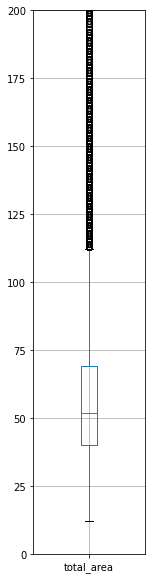

In [53]:
data.boxplot('total_area', figsize=(2, 10))
plt.ylim(0, 200)
plt.show()

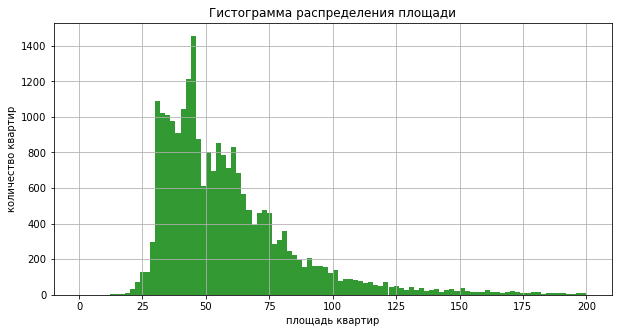

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения площади')
ax.grid()
plt.hist(data['total_area'], bins=100, range=(0, 200), alpha=0.8, color='green')
plt.xlabel('площадь квартир')
plt.ylabel('количество квартир')

plt.show()

In [55]:
len(data[data['total_area'] > 120])

1045

Гистограмма распределения и диаграмма размаха показывают, что большинство квартир по площади находятся в диапазоне от 25 до 120 квадратных метров. Квартир площадью больше 120 в разы меньше: с увеличением площади, частота стремится к оси абсцисс.

**Цена**

In [56]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [57]:
data.query('last_price > 50000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year
3,0,64900000,159,2015-07-24,3,777.00,14,98,9,True,...,234.0,424,4.081761e+05,другой,0.62,0.13,0.2,4,7,2015
155,8,96000000,317,2017-07-07,4,3.50,3,183,3,True,...,366.0,62,3.028391e+05,последний,0.58,0.11,0.19,4,7,2017
464,15,66571000,280,2015-06-11,6,5.20,8,159,7,True,...,616.0,578,2.377536e+05,другой,0.57,0.075,0.13,3,6,2015
492,18,95000000,216,2017-12-05,4,3.00,5,86,4,True,...,620.0,14,4.398148e+05,другой,0.4,0.36,0.9,1,12,2017
509,5,90000000,225,2016-06-26,6,777.00,4,134,2,True,...,519.0,416,4.000000e+05,другой,0.6,0.084,0.14,6,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000,127,2016-12-21,4,3.00,12,85,8,True,...,234.0,635,4.645669e+05,другой,0.67,0.1,0.15,2,12,2016
22804,4,81960000,205,2017-09-29,4,3.20,9,108,3,True,...,227.0,169,3.998049e+05,другой,0.53,0.049,0.093,4,9,2017
22831,18,289238400,187,2019-03-19,2,3.37,6,63,6,True,...,188.0,99999,1.546729e+06,последний,0.34,0.16,0.48,1,3,2019
22907,9,65000000,228,2016-06-02,4,777.00,5,200,2,True,...,269.0,99999,2.850877e+05,другой,0.88,0.11,0.12,3,6,2016


In [58]:
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year
5698,7,450000,42,2017-07-31,2,777.00,1,23,1,True,...,NaN,233,10714.285714,первый,0.55,0.12,0.22,0,7,2017
6859,6,490000,40,2017-12-11,1,777.00,5,19,3,True,...,NaN,43,12250.000000,другой,0.47,0.23,0.47,0,12,2017
8793,7,12190,109,2019-03-20,2,2.75,25,32,25,True,...,NaN,8,111.834862,последний,0.29,0.37,1.2,2,3,2019
9581,7,450000,43,2018-08-31,2,777.00,5,30,3,True,...,NaN,96,10465.116279,другой,0.7,0.12,0.17,4,8,2018
10782,3,490000,29,2016-05-05,1,2.50,5,17,5,True,...,NaN,719,16896.551724,последний,0.59,0.17,0.29,3,5,2016
14911,5,430000,54,2018-06-26,2,777.00,3,31,3,True,...,NaN,44,7962.962963,последний,0.57,0.15,0.26,1,6,2018
16032,8,480000,32,2019-01-06,1,777.00,2,16,1,True,...,NaN,83,15000.000000,первый,0.5,0.22,0.44,6,1,2019
16219,14,450000,38,2018-07-11,2,2.65,2,22,1,True,...,NaN,45,11842.105263,первый,0.58,0.16,0.27,2,7,2018
16274,18,440000,40,2018-07-10,1,777.00,5,19,1,True,...,NaN,45,11000.000000,первый,0.47,0.23,0.47,1,7,2018
17456,7,430000,30,2019-04-22,1,777.00,2,16,1,True,...,NaN,99999,14333.333333,первый,0.53,0.2,0.38,0,4,2019


Статистические характеристики говорят о том, что средняя цена за квартиру в Санкт-Петербурге и Ленобласти составляет 6,5 млн рублей, медианное значение же соответствует цифре в 4,6 млн рублей. Также заметно наличие явных выбросов - квартир, стоимость которых превышает 700 млн. Кроме того, минимальное значение - 12 тысяч рублей, что больше похоже на ошибку при вводе данных, чем на реальную стоимость квартиры. Вывод срезов позволяет увидеть, что 131 квартира в датасете стоит больше 50 млн рублей, 14 квартир стоят меньше 500 тысяч рублей, что тоже выглядит странно. Наличие выбросов критично влияет на среднюю цену. Посмотрим на диаграмму размаха в диапазоне от 500 тысяч до 50 млн. 

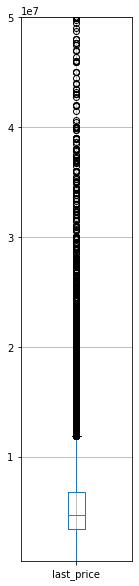

In [59]:
data.boxplot('last_price', figsize=(2, 10))
plt.ylim(500000, 50000000)
plt.show()

Мы видим, что большая часть значений лежит в диапазоне до 12 млн. Выведем гистограмму распределения.

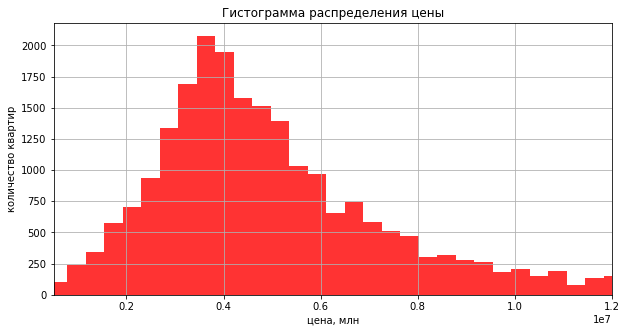

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения цены')
ax.grid()
plt.hist(data['last_price'], bins=2000, color='red', alpha=0.8)
ax.set_xlim([500000, 12000000])
plt.xlabel('цена, млн')
plt.ylabel('количество квартир')

plt.show()

In [61]:
len(data[data['last_price'] > 12000000])

1926

Такое распределение соответствует нормальному. Эти данные пригодятся нам для расчетов средней цены за квадратный метр в регионе. Остальные 1926 придется удалить.  

**Число комнат**

In [62]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Большинство квартир в датасете одно-, двух- или трехкомнатные, однако наблюдаются и такие, в которых число комнат достигает 19, а также некоторое количество квартир с открытой планировкой. 

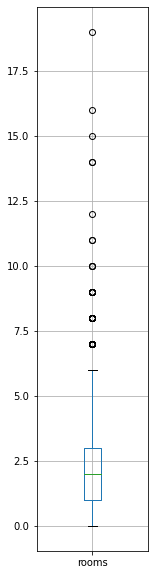

In [63]:
data.boxplot('rooms', figsize=(2, 10))
plt.show()

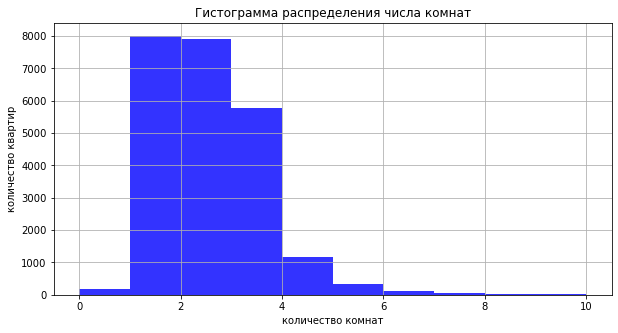

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения числа комнат')
ax.grid()
plt.hist(data['rooms'], bins=10, color='blue', alpha=0.8, range=(0, 10))
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')

plt.show()

Так, приблизительно 8 тысяч квартир в датасете однокомнатные, 7,9 тысяч - двухкомнатные, 5,8 тысяч квартир трехкомнатные, в 1,1 тысяче четыре комнаты, в 300 - 5 комнат и в 200 открытая планировка или студия. Распределение соотвествует нормальному с небольшой скошенностью вправо, поскольку в датасете встречаются редкие квартиры с числом комнат превышающим 6 (Их всего 90, от них можно избавиться). 

In [65]:
data.query('rooms > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year
581,20,65000000,365,2019-03-18,7,2.90,7,247,7,True,...,58.0,99999,178082.191781,последний,0.68,0.093,0.14,0,3,2019
648,3,17500000,183,2018-07-01,11,3.40,7,138,7,True,...,NaN,99999,95628.415301,последний,0.75,0.071,0.094,6,7,2018
660,3,49950000,483,2017-10-04,7,3.20,6,312,4,True,...,22.0,391,103416.149068,другой,0.65,0.054,0.083,2,10,2017
681,20,24900000,249,2015-08-13,7,777.00,5,180,4,True,...,NaN,781,100000.000000,другой,0.72,0.092,0.13,3,8,2015
750,9,29500000,188,2017-03-04,7,2.70,2,119,1,True,...,267.0,246,156914.893617,первый,0.63,0.053,0.084,5,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,20,22000000,141,2019-01-24,7,777.00,5,84,2,True,...,468.0,90,156028.368794,другой,0.6,0.18,0.3,3,1,2019
22420,12,25000000,196,2016-11-04,7,3.50,6,145,5,True,...,NaN,99999,127551.020408,другой,0.74,0.087,0.12,4,11,2016
22649,18,22900000,206,2016-04-04,7,777.00,6,142,2,True,...,251.0,75,111165.048544,другой,0.69,0.078,0.11,0,4,2016
23400,17,30000000,213,2017-09-28,7,3.40,5,151,5,True,...,30.0,299,140845.070423,последний,0.71,0.14,0.2,3,9,2017


**Высота потолков**

In [66]:
data['ceiling_height'].describe()

count    23565.000000
mean       301.200567
std        376.853469
min          1.000000
25%          2.600000
50%          2.900000
75%        777.000000
max        777.000000
Name: ceiling_height, dtype: float64

Ранее пропуски, которых было довольно много, были заменены на маркеры, что повлияло на среднее значение. Для построения гистограммы их необходио отсечь. 

In [67]:
ceiling_cut = data.query('ceiling_height != 777')
ceiling_cut['ceiling_height'].describe()

count    14481.000000
mean         2.729325
std          0.319779
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

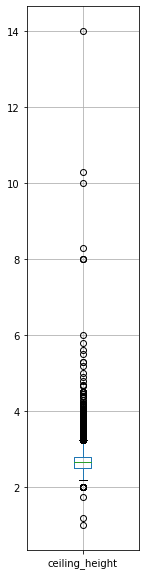

In [68]:
ceiling_cut.boxplot('ceiling_height', figsize=(2, 10))
plt.show()

Диаграмма размаха показывает, что выбросы есть по обеим сторонам от "усов" диаграммы. В целом, средняя высота потолков по городу варьируется от 2,5 до 3 м. 

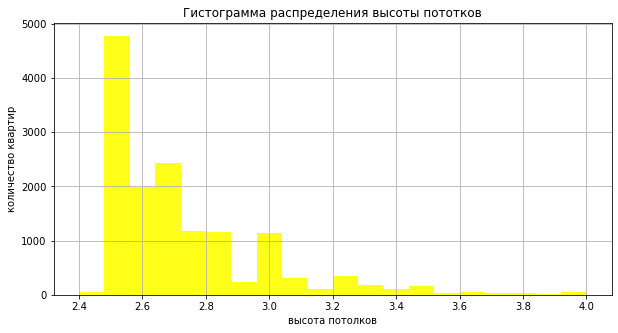

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения высоты пототков')
ax.grid()
plt.hist(ceiling_cut['ceiling_height'], bins=20, range=(2.4, 4), color='yellow', alpha=0.9)
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')

plt.show()

В абсолютном большинстве квартир высота потолка составляет 2,5 м. Также на графике заметно, что существует некоторая совокупность квартир с потолками 2,6 м, 2,7 м, 2,8 м и 3 м. Это указыввает на обилие типовой застройки в регоине. Согласно графику, для дальнейшей работы нам понадобятся данные в пределах от 2,4 (законодательный минимум) до 3,5 метров.

### Изучение время продажи квартиры

In [70]:
data['days_exposition'].describe()

count    23565.000000
mean     13612.682750
std      34065.040353
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max      99999.000000
Name: days_exposition, dtype: float64

Пропуски в этих данных также заполнены маркерами, поскольку, вероятно, на момент создания датасета квартира все еще находилась в продаже. Оценим статистические характеристики без учета пропусков. 

In [71]:
days_cut = data.query('days_exposition != 99999')
days_cut['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана времени продажи составляет 95 дней, тогда как среднее почти в два раза больше - 180 дней. Это говорит о том, что в данных большое количество крупных значений, выходящих за рамки стандартного времени продажи.

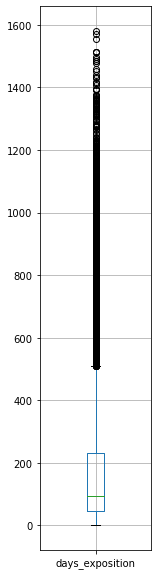

In [72]:
days_cut.boxplot('days_exposition', figsize=(2, 10))
plt.show()

Действительно, диаграмма размаха показывает, что в среднем квартиры продаются в течение полутора лет, однако многие из тех, что предсталены в датасете, были выставлены на продажу в течение двух, трех и более лет. 

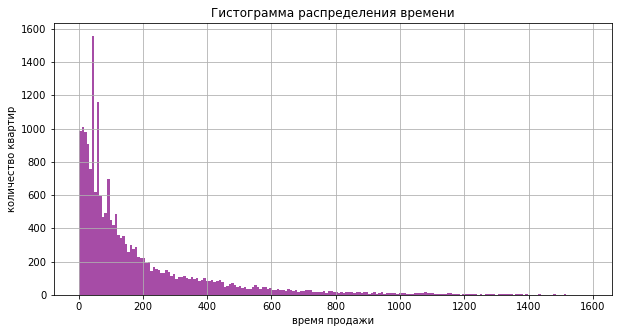

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения времени')
ax.grid()
plt.hist(days_cut['days_exposition'], bins=200, color='purple', alpha=0.7)
plt.xlabel('время продажи')
plt.ylabel('количество квартир')

plt.show()

Выставим для гистограммы лимиты по "усам" диаграммы размаха. 

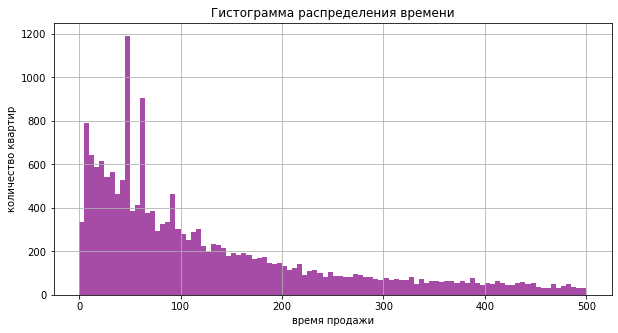

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Гистограмма распределения времени')
ax.grid()
plt.hist(days_cut['days_exposition'], range=(0, 500), bins=100, color='purple', alpha=0.7)
plt.xlabel('время продажи')
plt.ylabel('количество квартир')

plt.show()

In [75]:
len(days_cut[days_cut['days_exposition'] <= 45])

5950

In [76]:
len(days_cut[days_cut['days_exposition'] <= 231])

15300

In [77]:
len(days_cut[days_cut['days_exposition'] <= 365])

17369

In [78]:
len(days_cut[days_cut['days_exposition'] > 500])

1737

In [79]:
len(data[data['days_exposition'] == 99999])

3171

In [80]:
year = data.query('days_exposition <= 365')
year['days_exposition'].mean()

104.85358972882722

Почти 6 тысяч квартир в датасете были проданы менее, чем за полтора месяца (45 дней). Это параметр, по которому можно считать, что квартира была продана быстро. В рамках третьего квартиля (231 день и 7,7 месяцев) было продано еще 9,5 тысяч квартир. "Усы" диаграммы размаха заканчиваются на отметке в 500 дней, значит абсолютное большинство квартир продается в пределах полутора лет. 

Если рассматривать более удобный временной промежуток, то 17,3 квартир было продано за первый год с момента выставления объявления. В среднем за год квартира продается за 3,5 месяца (104 дня). 

В более 3 тысячах объявлений снятия квартир с продажи не указана. 

### Редкие или выбивающиеся значения 

Опираясь на предыдущие расчеты, нам необходимо избавиться от выбросов, поскольку они не позволяют качественно оценить среднюю цену за квадратный метр за стандартную квартиру в регионе площадью до 120 метров, с высотой потолков до 3,5 метров, количеством комнат не превышающим 6 и ценой до 12 млн рублей, коих большинство. Аномалии в данном случае могут негативно повлиять на построение автоматизированной системы расчета данных на рынке недвижимости. 

**Площадь**

In [81]:
data.drop(data[data['total_area'] > 120].index, inplace=True)
len(data['total_area'])

22520

**Цена**

In [82]:
data.drop(data[data['last_price'] > 12000000].index, inplace=True)
data.drop(data[data['last_price'] < 500000].index, inplace=True)
len(data['last_price'])

21495

**Высота потолков**

Выбросов и пропусков в этих данных настолько много, что их удаление повлечет уменьшение датасета почти на 40 процентов. Данные о высоте потребуются нам для анализа сегмента квартир в центре Петербурга, поэтому позже посчитаем, какой процент данных некорректен, учитывая сегментацию. 

**Количество комнат** 

In [83]:
data.drop(data[data['rooms'] > 6].index, inplace=True)
len(data['rooms'])

21495

Большое количество комнат, цена и площадь связаны, поскольку удаление неподходящих для анализа данных о количестве комнат после ликвидации выбросов в цене и площади не изменило количество строк в датасете. 

In [84]:
data.shape

(21495, 30)

***Вывод***

Таким образом, у нас осталось 21495 строк, пригодных для анализа, не учитывая данные о высоте потолков. 

### Исследование факторов, влияющих на стоимость квартиры ###

Нам необходимо выяснить, зависит ли цена от площади, числа комнат, удалённости от центра, а также от того, на каком этаже расположена квартира: первом, последнем или другом, и от даты размещения: дня недели, месяца и года.

**Зависимость цены от площади**

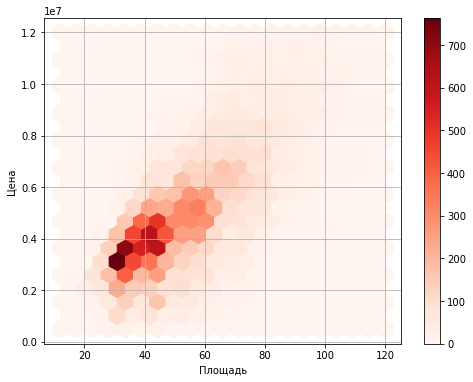

In [85]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Reds)
plt.xlabel('Площадь')
plt.ylabel('Цена ')
plt.show()

График показывает, что с увеличением площади растет цена на квартиру. Так, если цена за квартиру площадью 35 кв.м около 3,7 млн. рублей, то квартира площадью 60 кв.м стоит уже 5,8 млн. рублей.  

**Зависимость цены от числа комнат** 

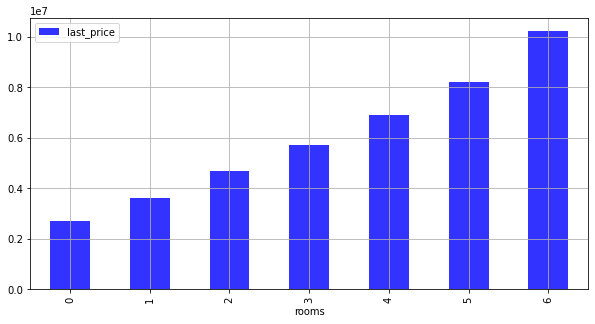

In [86]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(
    kind='bar', figsize=(10, 5), grid=True, color='blue', alpha=0.8)
plt.show()

Наблюдается прямая зависимость цены от количества комнат, связанная еще к тому же и с увеличением площади. Медианная цена за студию в Санкт-Петербурге и Ленобласти примерно 2,8 млн. рублей, цена за трехкомнатную квартиру в районе 5,8 млн. рублей. 

**Зависимость цены от этажа**

In [87]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year
1,7,3350000,40,2018-12-04,1,777.00,11,18,1,True,...,NaN,81,83750.000000,первый,0.45,0.28,0.61,1,12,2018
2,10,5196000,56,2015-08-20,2,777.00,5,34,4,True,...,574.0,558,92785.714286,другой,0.61,0.14,0.24,3,8,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,True,...,48.0,121,100000.000000,другой,0.32,0.41,1.3,1,6,2018
5,10,2890000,30,2018-09-10,1,777.00,12,14,5,True,...,NaN,55,96333.333333,другой,0.47,0.3,0.64,0,9,2018
6,6,3700000,37,2017-11-02,1,777.00,26,10,6,True,...,NaN,155,100000.000000,другой,0.27,0.38,1.4,3,11,2017


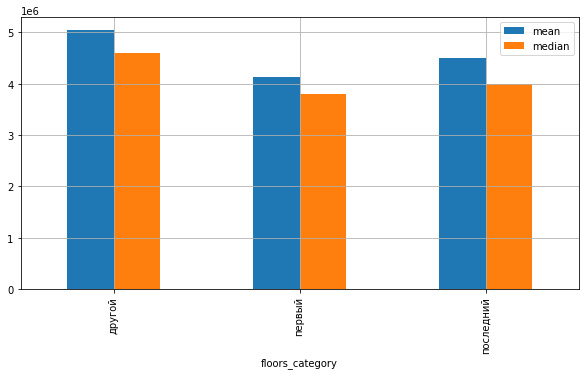

In [88]:
data.pivot_table(index='floors_category', values='last_price', aggfunc=('median', 'mean')).plot(
    kind='bar', figsize=(10, 5), grid=True)
plt.show()

Цена квартир на первом этаже заметно ниже, чем тех, что находятся на другом уровне лестничной клетки. Последний этаж тоже не пользуется популярностью, но все-таки чуть менее, чем первый. Так, в среднем, квартира на первом этаже стоит 4,1 млн. рублей, квартира на условно 4 этаже 5 млн. рублей, на последнем этаже в доме - 4,5 млн. рублей. 

**Зависимость цены от локации** 

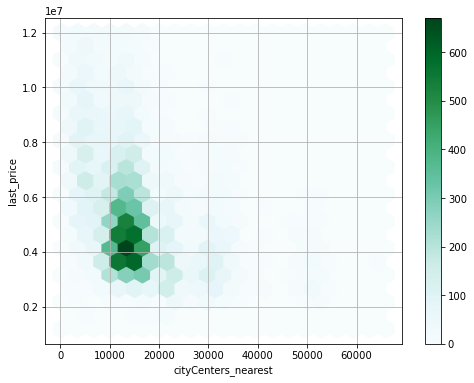

In [89]:
data.query('cityCenters_nearest != 5555555').sort_values('cityCenters_nearest').plot(x='cityCenters_nearest', y='last_price', 
                                    kind='hexbin', gridsize=20, figsize=(8, 6), grid=True, sharex=False)
plt.show()

Наибольшее число квартир, представленных в датасете расположено примерно в 12 км от центра Петербурга и цена их находится в районе 4,2-5,1 млн. рублей. На графике видно, что близость к центру прямо влияет на рост цены. Так, уже в пределах 5 км от центра стоимость некоторого количества квартир растет в цене и превышает отметку в 6,3 млн. рублей. 

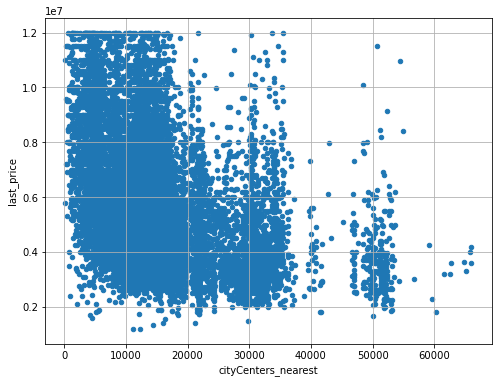

In [90]:
data.query('cityCenters_nearest != 5555555').sort_values('cityCenters_nearest').plot(
    x='cityCenters_nearest', y='last_price', kind='scatter', 
    figsize=(8, 6), grid=True)
plt.show()

Точечное рассеивание более наглядно показывает, как квартиры дорожают, если их локация приближается к центру Санкт-Петербурга. В пределах 20 км от центра количество квартир, превышающих ценник в 10 млн в разы больше, чем за чертой города. На расстоянии в 50 км от центра Питера средний ценник на недвижимость примерно 3,7 млн. рублей. 

**Зависимость цены от времени размещения** 

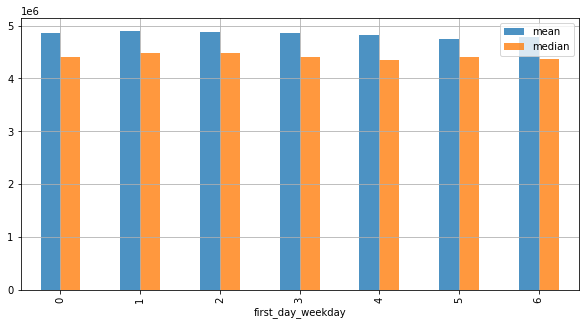

In [91]:
data.pivot_table(index='first_day_weekday', values='last_price', aggfunc=('median', 'mean')).plot(
    kind='bar', figsize=(10, 5), grid=True, alpha=0.8)
plt.show()

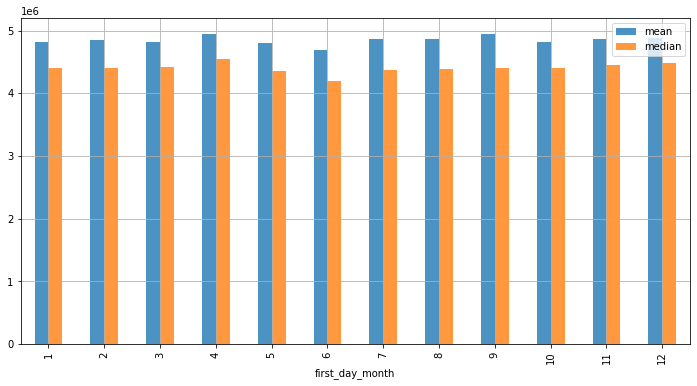

In [92]:
data.pivot_table(index='first_day_month', values='last_price', aggfunc=('median', 'mean')).plot(
    kind='bar', figsize=(12, 6), grid=True, alpha=0.8)
plt.show()

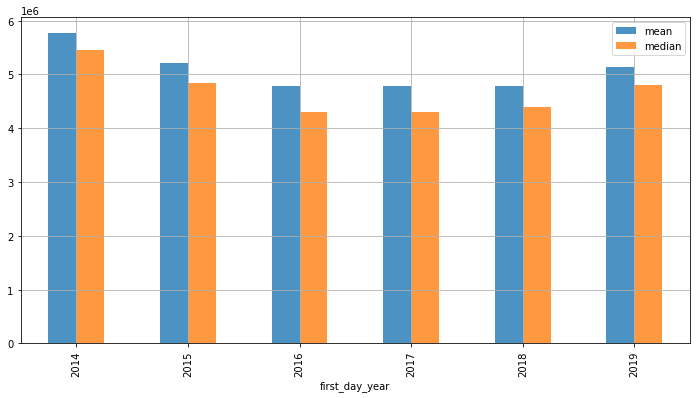

In [93]:
data.pivot_table(index='first_day_year', values='last_price', aggfunc=('median', 'mean')).plot(
    kind='bar', figsize=(12, 6), grid=True, alpha=0.8)
plt.show()

Графики показывают, что день недели особо не влияет на ценообразование: разница составляет около 50 тысяч рублей. Тем не менее, можно сказать, что выгоднее всего продавать во вторник, среду и выходные. Пятница наименее удачное время для продажи недвижимости. 

Месяц продажи уже более влиятельный фактор. Опираясь на медианные значения, наименее удачная для продавца сделка может пройти в июне. Далее цена понемногу растет к концу года. В начале года происходит некоторая стагнация: в течение января-марта цена не меняется, однако, пик происходит уже в апреле. Волатильность рынка недвижимости, судя по этому графику, можно объяснить психологическими факторами и сезонностью. Средние значения превышают медианные почти на половину миллиона, в апреле и сентябре достигают почти 5 млн. (тогда как медиана 4,6 и 4,3 соответственно) и менее понятны для анализа. Средняя цена на недвижимость меняется от месяца к месяцу, вероятно, это связано с продажами более дорогих квартир с переменным успехом, значения которых вляют на усредненное. Тем не менее, средняя цена в июне все так же самая низкая - 4,7 (медиана - 4,2)

Согласно третьему график, рынок недвижимости в Санкт-Петербурге и Ленобласти упал в 2016 году среднее значение достигло 4,7 (4,3 медиана), тенденция сохранилась и в следующем году. В 2018 году начался рост и резко продолжился в 2019 году - 5,1 среднее (4,8 медиана). Пиковые значения стоимости в рамках данного в датасете периода жилье имело в 2014 - почти 5,8 млн. рублей (5,45 медиана).

*Однако стоит отметить, что графики выше построены на данных с учетом тех объявлений, продажа которых еще не закрыта.* 

In [94]:
year_2019 = data.query('first_day_year == 2019')
year_2019['days_exposition'].value_counts().head()

99999    1581
45         47
7          40
5          35
60         31
Name: days_exposition, dtype: int64

In [95]:
year_2018 = data.query('first_day_year == 2018')
year_2018['days_exposition'].value_counts().head()

99999    776
45       476
60       280
7        128
4         87
Name: days_exposition, dtype: int64

Большинство незакрытых объявлений датируются 2018 и 2019 годом. Для сравления посмотрим на график распределения цены по годам без учета объявлений, в которых не указано количество дней размещения. 

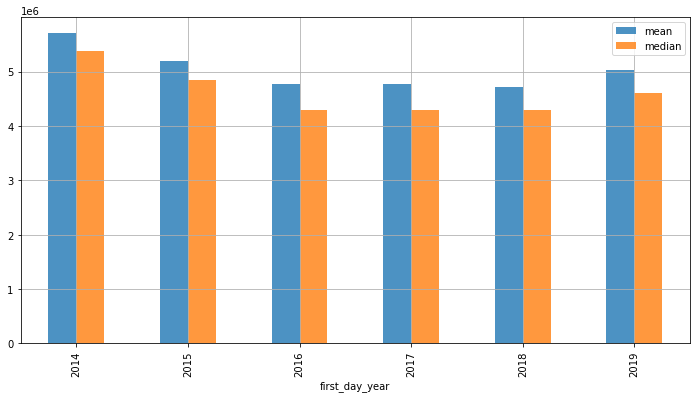

In [96]:
data.query('days_exposition != 99999').pivot_table(index='first_day_year', values='last_price', 
            aggfunc=('median', 'mean')).plot(kind='bar', figsize=(12, 6), grid=True, alpha=0.8)
plt.show()

Незакрытые объявления, в целом, не влияют на средний ценник на недвижимость в рамках годовой статистики. Несмотря на то, что полторы тысячи объявлений в 2019 году не имеют данных о дате снятия их с продажи, средняя цена на квартиру в регионе все также достигает 5 млн. рублей. 

***Вывод***

Таким образом, такие факторы как площадь, число комнат, удаленность от центра, этаж и дата размещения (особенно год) влияют на ценообразование на рынке недвижимости в Санкт-Петербурге и Ленобласти. 

### Анализ десяти населенных пунктов с наибольшим числом объявлений ###

Нам необходимо посчитать среднюю цену за квадратный метр в населенных пунктах с наибольшим количеством объявлений и выяснить, в каком из них цена за метр наибольшая и наименьшая. 

In [97]:
data['locality_name'].value_counts().head(10)

санкт-петербург    13694
мурино               586
кудрово              468
шушары               438
всеволожск           394
пушкин               338
колпино              335
парголово            326
гатчина              303
выборг               232
Name: locality_name, dtype: int64

Создадим словарь, обращение к которому позволит нам создать сводную таблицу только с теми населенными пунктами, которые нас инетересуют.

In [98]:
locality_list = ['санкт-петербург', 
                        'мурино', 
                        'кудрово', 
                        'шушары', 
                        'всеволожск', 
                        'пушкин', 
                        'колпино', 
                        'парголово', 
                        'гатчина', 
                        'выборг']

In [99]:
locality_price = data.query('locality_name in @locality_list').pivot_table(index='locality_name', values='price_per_metre', aggfunc='mean')
locality_price.sort_values(by='price_per_metre', ascending=False)

,price_per_metre
locality_name,
санкт-петербург,106369.346299
пушкин,100894.974333
кудрово,95638.381258
парголово,90833.211024
мурино,86677.958763
шушары,78932.857393
колпино,75535.215462
гатчина,68966.408848
всеволожск,67551.417955


***Вывод***

Согласно таблице, средний ценник за квадратный метр в Санкт-Петербурге и Ленобласти наиболее высокий в самом Петербурге - 106,3 тысяч рублей за единицу. Чуть меньше стоит квадратный метр в Пушкине, но также превышает отметку в 100,8 тысяч рублей. Самая низкая стоимость квадратного метра (среди наиболее часто втречающихся населенных пунктов в объявлениях) в Выборге - 58,3 тысяч. 

### Анализ изменения цены по степени удаленности от центра ###

Максимальное расстояние от квартиры в объявлении до центра Санкт-Петербурга 29 км. Эта недвижимость расположена, вероятно, в Петродворцовом или Курортном районе города, которые также входят в границы федерального субъекта. Нам необходимо выяснить, какая область входит в центр.

In [100]:
data.loc[data['locality_name'] == 'санкт-петербург', 'cityCenters_nearest'].max()

29493.0

Создадим столбец с расстоянием до центра в километрах и посчитаем среднюю цену на недвижимость для каждого километра. 

In [101]:
data['center_km'] = (data['cityCenters_nearest'] / 1000).astype('int')
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_metre,floors_category,living_ratio,kitchen_ratio,kitchen_to_living_ratio,first_day_weekday,first_day_month,first_day_year,center_km
1,7,3350000,40,2018-12-04,1,777.00,11,18,1,True,...,81,83750.000000,первый,0.45,0.28,0.61,1,12,2018,18
2,10,5196000,56,2015-08-20,2,777.00,5,34,4,True,...,558,92785.714286,другой,0.61,0.14,0.24,3,8,2015,13
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,True,...,121,100000.000000,другой,0.32,0.41,1.3,1,6,2018,8


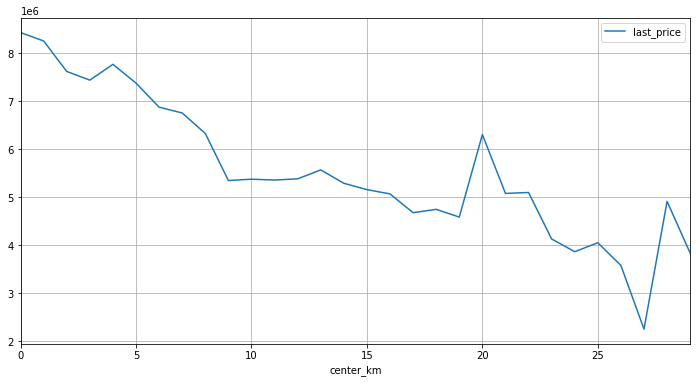

In [102]:
spb_price = data.query('locality_name == "санкт-петербург"').sort_values('center_km').pivot_table(
    index='center_km', values='last_price', aggfunc='mean').plot(xlim=(0, 29), grid=True, figsize=(12, 6))
plt.show()

***Вывод***

Согласно графику, в пределах 4 км от точки отсчета средняя цена за квартиру в районе 7,5-8,3 млн. рублей. Далее с точки в 7,7 млн. и 4 км график снижается до отметки в 5,4 млн. рублей и 9 км. Затем до отметки в 19 км стоимость недвижимости варьируется от 5,5 до 4,6 млн. рублей. После точки в 19 км график резко растет вверх до 6,3 млн. и резко падает вниз на отметке в 27 км дл 2,3 млн. Можно предположить, что где-то на расстоянии в 20 км от центра города находится большое количество элитной застройки с высоким средним ценником, и, допустим, типовых однушек в радиусе 27 км. Либо в целом в датасете не так много объявлений, которые подпадают под условие "находятся в Санкт-Петербурге" и "удаленность от центра более 20 км". Поэтому единичные случаи появления таких объявлений влияют на перепады графика. 

Так, выделим условные зоны, где радиус 4 км - центр, 9 км - близко к центру, 19 км - далеко от центра, 29 км - окраина. 

### Анализ квартир в центре ###

Мы определили, что центральную часть города будем ограничивать радиусом 4 км. Нам необходимо проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Для удобства создадим отдельный столбец с категориями: центр, близко к центру и далеко от центра, остальные - условная область. Не будем учитывать зону окраины, поскольку с 19 км уже начинается территория Парголово, не входящая в ядро агломерации.  

In [103]:
def center_category(km):
    if km <= 4:
        return 'центр'
    if km > 4 and km <= 9:
        return 'близко к центру'
    if km > 9 and km < 19:
        return 'далеко от центра'
    return 'область'

data['center_category'] = data['center_km'].apply(center_category)

center_category(3)

'центр'

Теперь проанализируем каждый параметр в разных зонах города. 

**Площадь**

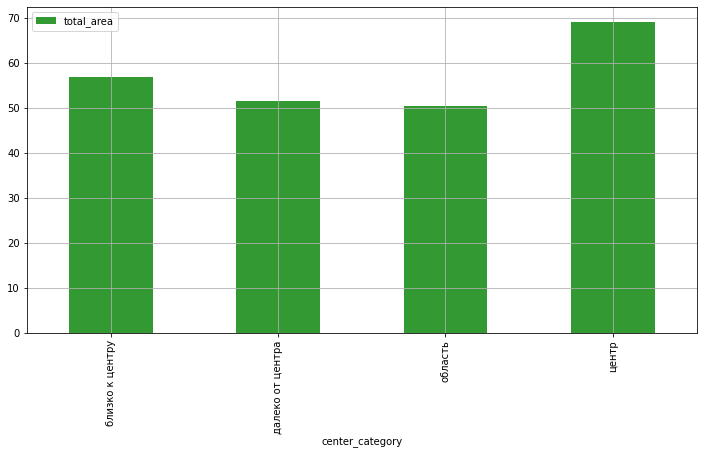

In [104]:
data.pivot_table(index='center_category', values='total_area', aggfunc='mean').plot(
    kind='bar', figsize=(12, 6), grid=True, color='green', alpha=0.8)
plt.show()

Чем дальше от центра, тем меньше средняя площадь недвижимости. Для квартир в центре она составляет 68 кв.м, в радиусе 9 км - 57 кв.м, на окраине города - 52 кв.м. В области - 50 кв.м. 

**Цена** 

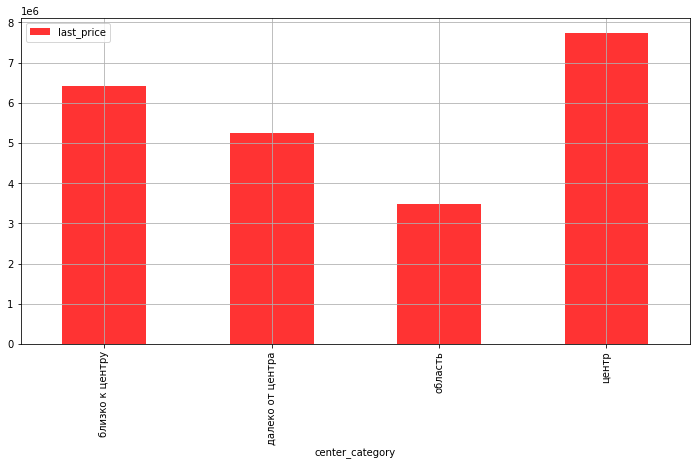

In [105]:
data.pivot_table(index='center_category', values=('last_price'), aggfunc='mean').plot(
    kind='bar', figsize=(12, 6), grid=True, color='red', alpha=0.8)
plt.show()

В среднем цена за квартиру в центральном районе составляет 7,7 млн. рублей, тогда как на окраине этот показатель чуть выше 5 млн. В районах, приближенных к центру средний ценник на жилье - 6,4 млн. рублей. В области - 3,5 млн. Разница между центром и периферией составляет почти 2,5 млн рублей. 

**Число комнат**

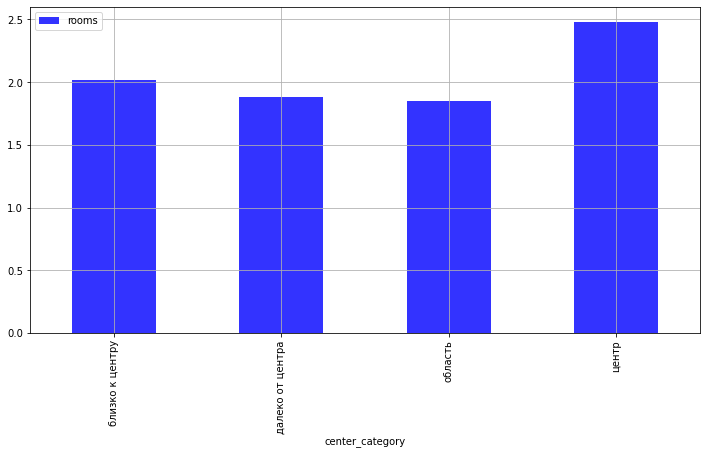

In [106]:
data.pivot_table(index='center_category', values=('rooms'), aggfunc='mean').plot(
    kind='bar', figsize=(12, 6), grid=True, color='blue', alpha=0.8)
plt.show()

В центре квартир с большим числом комнат больше. На периферии средний показатель меньше двух, значит однокомнатных квартир довольно много. 

**Высота потолка**

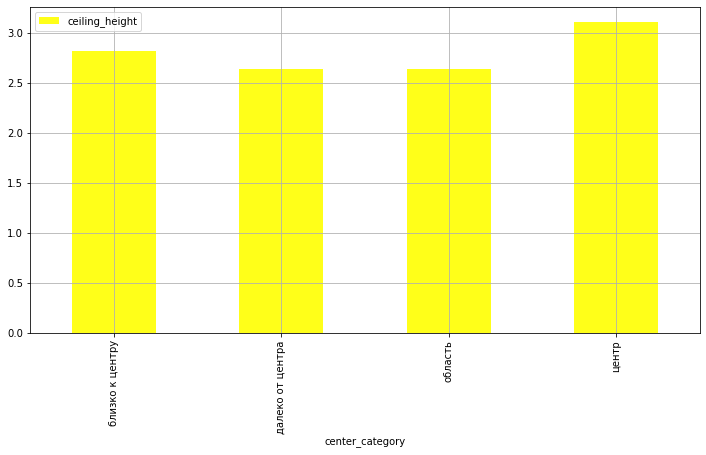

In [107]:
data.query('ceiling_height != 777').pivot_table(
    index='center_category', values=('ceiling_height'), aggfunc='mean').plot(
    kind='bar', figsize=(12, 6), grid=True, color='yellow', alpha=0.9)
plt.show()

Чтобы не портить статистику, предварительно убрали строки, пропуски в которых были заменены маркерами. В центральной части города потолки самые высокие - в среднем 3,2 метра. В радиусе 9 км высота составляет 2,8 м, на периферии и в области - 2,6 м.  

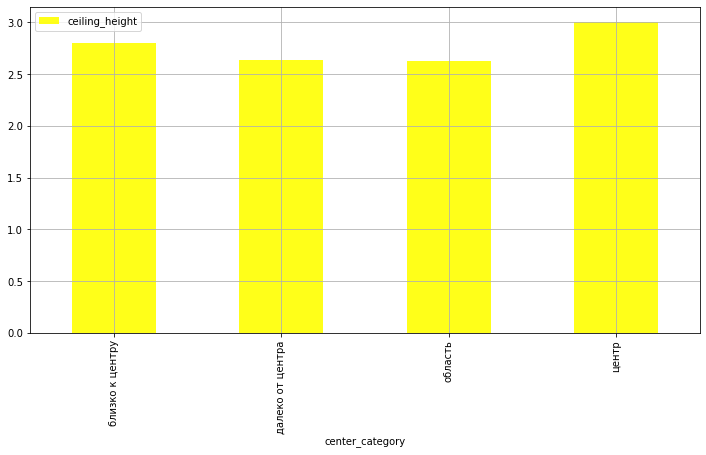

In [108]:
data.query('ceiling_height > 2.4 and ceiling_height < 3.5').pivot_table(
    index='center_category', values=('ceiling_height'), aggfunc='mean').plot(
    kind='bar', figsize=(12, 6), grid=True, color='yellow', alpha=0.9)
plt.show()

Посмотрим данные по срезу значений с ограничениями, выведенными выше: не меньше 2,4 м и не больше 3,5 м в высоту. Здесь меняется только средняя высота потолка в центральной части города с 3,2 м до 3 м. Это связано с тем, что в границах центра наблюдается предложение недвижимости, высота потолков в которой превышает стандартную. Влияние выбросов здесь некритично, поскольку мы можем допустить, что высота потолков в старом фонде достигает больших значений по сравнению с более поздней застройкой, расположеной на окраинах города и в области.

**Зависимость цены от числа комнат** 

Рассмотрим только те квартиры, которые находятся в рамках самого города.

In [109]:
spb_center_rooms = data.query('center_category == "центр"').pivot_table(
    index='rooms', values='last_price', aggfunc='mean')
spb_city_rooms = data.query('center_category != "центр" and center_category != "область"').pivot_table(
    index='rooms', values='last_price', aggfunc='mean')

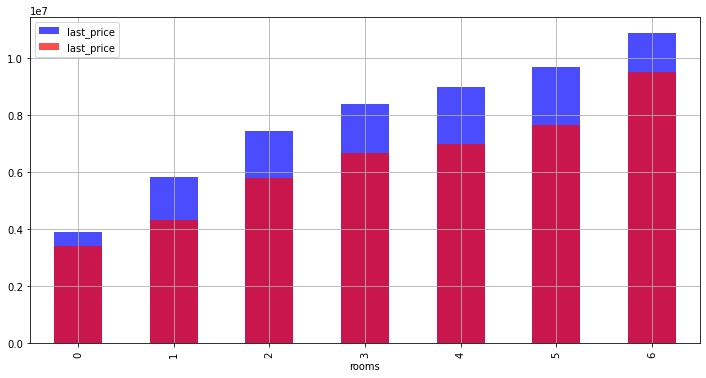

In [110]:
ax = spb_center_rooms.plot(
    kind='bar', 
    alpha=0.7, 
    color='blue', 
    label='center', 
    grid=True,
    figsize=(12, 6))

spb_city_rooms.plot(
    kind='bar',  
    alpha=0.7, 
    color='red', 
    label='city', 
    ax=ax, 
    grid=True,
    legend=True, 
    figsize=(12, 6))
plt.show()

График показывает, что средний ценник на квартиру в центре Петербурга больше, чем в пределах городской черты на 1,5 млн. Разница цен на студии меньше: 3,5 не в центре, почти 4 в центре. Однушка, двушка и трешка в пределах города и в пределах центральной части города обойдутся в 4,2/5,9 млн., 5,9/7,4 млн., 6,7/8,3 млн. соотвественно. Пятикомнатную квартиру не в центре можно купить за 7,8 млн., в центре города за 9,7 млн. рублей.

**Зависимость цены от этажа** 

In [111]:
spb_center_floors = data.query('center_category == "центр"').pivot_table(
    index='floors_category', values='last_price', aggfunc='mean')
spb_city_floors = data.query('center_category != "центр" and center_category != "область"').pivot_table(
    index='floors_category', values='last_price', aggfunc='mean')

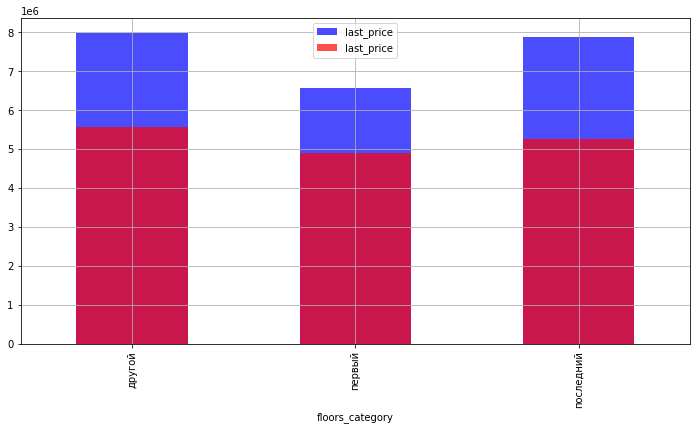

In [112]:
ax = spb_center_floors.plot(
    kind='bar', 
    alpha=0.7, 
    color='blue', 
    label='center', 
    grid=True,
    figsize=(12, 6))

spb_city_floors.plot(
    kind='bar',  
    alpha=0.7, 
    color='red', 
    label='city', 
    ax=ax, 
    grid=True,
    legend=True, 
    figsize=(12, 6))
plt.show()

Так же как и по городу, первый этаж в центре пользуется меньшей популярностью, чем другие. Последний этаж в центре, в отличие от остальной части города, наоборот, догоняет в цене любой другой. 

**Зависимость цены от даты размещения** 

Посмотрим зависимость цены в центре от даты размещения. 

По дням недели.

In [113]:
spb_center_price = data.query('center_category == "центр"').pivot_table(
    index='first_day_weekday', values='last_price', aggfunc='mean')
spb_city_price = data.query('center_category != "центр"').pivot_table(
    index='first_day_weekday', values='last_price', aggfunc='mean')

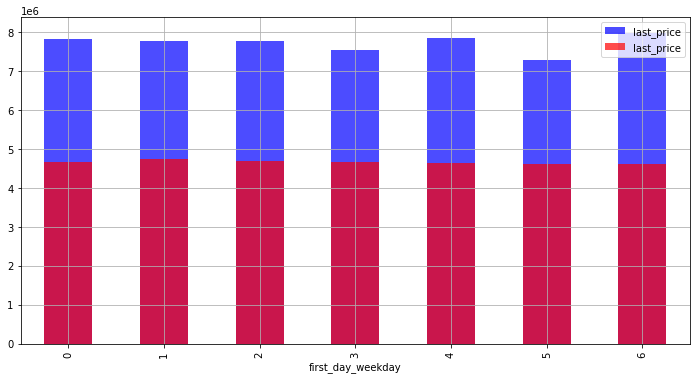

In [114]:
ax = spb_center_price.plot(
    kind='bar', 
    alpha=0.7, 
    color='blue', 
    label='center', 
    grid=True,
    figsize=(12, 6))

spb_city_price.plot(
    kind='bar',  
    alpha=0.7, 
    color='red', 
    label='city', 
    ax=ax, 
    grid=True,
    legend=True, 
    figsize=(12, 6))
plt.show()

В центральной части города в субботу наблюдается уменьшение средней цены по сравнению с пятницей на почти на пол миллиона. В воскресенье, наоборот, цена повышается до 8 млн. в среднем, тогда как в других районах день недели очевидно не влияет на ценообразование. 

По месяцам.

In [115]:
spb_center_price = data.query('center_category == "центр"').pivot_table(
    index='first_day_month', values='last_price', aggfunc='mean')
spb_city_price = data.query('center_category != "центр"').pivot_table(
    index='first_day_month', values='last_price', aggfunc='mean')

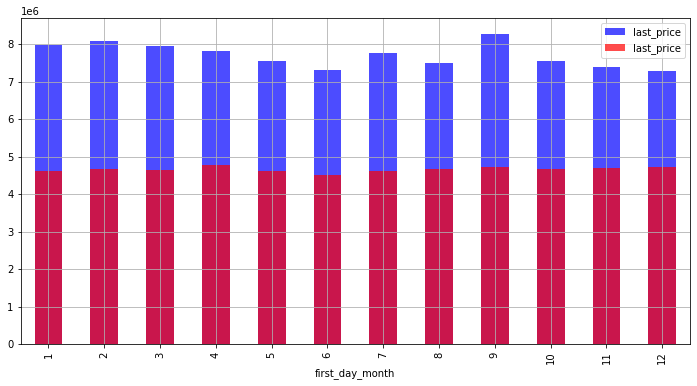

In [116]:
ax = spb_center_price.plot(
    kind='bar', 
    alpha=0.7, 
    color='blue', 
    label='center', 
    grid=True,
    figsize=(12, 6))

spb_city_price.plot(
    kind='bar',  
    alpha=0.7, 
    color='red', 
    label='city', 
    ax=ax, 
    grid=True,
    legend=True, 
    figsize=(12, 6))
plt.show()

Самое выгодное время для продажи квартиры в центре - сентябрь. Здесь средняя цена превышает 8 млн., в то время как в июле, например, она достигает отметки только в 7,3 млн. рублей, но в июле повышается до 7,7 млн. Также невыгодно продавать в декабре (7,3 млн. в среднем), но в начале года наблюдается рост и в феврале средняя цена снова чуть выше 8 млн. рублей. Далее - спад до июня. Сезонная зависимость цены от даты размещения в центре более явная, поскольку разница между минимальным и максимальным значением составляет почти 1 млн. рублей. 

По годам. 

In [117]:
spb_center_price = data.query('center_category == "центр"').pivot_table(
    index='first_day_year', values='last_price', aggfunc='mean')
spb_city_price = data.query('center_category != "центр"').pivot_table(
    index='first_day_year', values='last_price', aggfunc='mean')

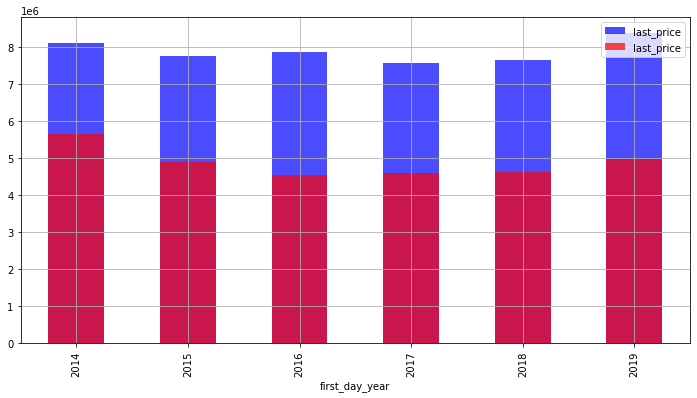

In [118]:
ax = spb_center_price.plot(
    kind='bar', 
    alpha=0.7, 
    color='blue', 
    label='center', 
    grid=True,
    figsize=(12, 6))

spb_city_price.plot(
    kind='bar',  
    alpha=0.7, 
    color='red', 
    label='city', 
    ax=ax, 
    grid=True,
    legend=True, 
    figsize=(12, 6))
plt.show()

В то время, как 2016 год оказался годом просадки для недвижимости за пределами центра, в центре средний ценник немного поднялся по сравнению с 2015 годом. В отличие от периферии, где пик цены наблюдался в 2014, пиковым годом по стоимости жилья в центре Санкт-Петербурга оказался 2019 - средняя цена 8,3 млн. рублей (5 млн. рублей в остальной части города). Наименьшая же стоимось была также в 2017 и 2018 году - примерно 7,6 млн. рублей. 

## Общий вывод

Итак, опираясь на данные, мы можем выделить несколько стандартных ***параметров***, позволяющих определять рыночную стоимость недвижимости в Санкт-Петербурге и Ленинградской области. Центральный район города обозначается радиусом в *4 км*, районы, граничащие с центральным в границах *9 км*, городская окраина определяется зоной в *19 км* от центра. Остальное - областная территория. 

***Площадь***

Средняя площадь квартир в регионе составляет *60 кв. метров*, минимальная и максимальная при этом *12* и *900* метров соответственно. Большинство квартир по площади находятся в диапазоне *от 25 до 120 кв. метров*. 
Чем дальше от центра, тем меньше средняя площадь недвижимости. Для квартир в центре она составляет *68 кв.метра*, в радиусе 9 км - *57 кв.метров*, на окраине города - *52 кв.метров*. В области - *50 кв.метров*.

***Число комнат***

Приблизительно 8 тысяч квартир в датасете однокомнатные, 7,9 тысяч - двухкомнатные, 5,8 тысяч квартир трехкомнатные, в 1,1 тысяче четыре комнаты, в 300 - 5 комнат и в 200 открытая планировка или студия. В центре квартир с большим числом комнат больше. На периферии больше продают однокомнатные квартиры.

***Высота потолков***

В центральной части города потолки самые высокие - в среднем *3,2 метра*. В радиусе 9 км высота составляет *2,8 м*, на периферии и в области - *2,6 м*. В границах центра наблюдается предложение недвижимости, высота потолков в которой превышает стандартную: в старом фонде высота достигает больших значений по сравнению с более поздней застройкой, расположеной на окраинах города и в области.

***Время продажи***

*25,2%* квартир в датасете были проданы *менее, чем за полтора месяца* (45 дней). Это параметр, по которому можно считать, что квартира была продана быстро. 

В рамках третьего квартиля (231 день и 7,7 месяцев) было продано еще *39,6%* квартир. Абсолютное большинство квартир продается в пределах *полутора лет*. 

Если рассматривать более удобный временной промежуток, то *73,7%* квартир было продано за *первый год* с момента выставления объявления. В среднем за год квартира продается за *3,5 месяца* (104 дня). 

*7,3%* предложений требуют более тщательного анализа, поскольку их публикация на сервисе находилась в продаже более полутора лет и может быть связана с мошеннической деятельностью или несоответствием недвижимости основным рыночным характеристикам. 

***Цена***

Средний ценник за квадратный метр в Санкт-Петербурге и Ленобласти наиболее высокий в самом Петербурге - *106,3 тысяч рублей* за единицу. Чуть меньше стоит квадратный метр в Пушкине, но также превышает отметку в *100,8 тысяч рублей*. Самая низкая стоимость квадратного метра (среди наиболее часто втречающихся населенных пунктов в объявлениях) в Выборге - *58,3 тысяч*.

Средняя цена за квартиру в Санкт-Петербурге и Ленобласти составляет *6,5 млн рублей*, медианное значение же соответствует цифре в *4,6 млн рублей*.

Цена за квартиру в центральном районе в среднем составляет *7,7 млн. рублей*. В районах, приближенных к центру средний ценник на жилье - *6,4 млн. рублей*, тогда как на окраине этот показатель чуть выше *5 млн.* В области - *3,5 млн.* 

Разница между городским центром и периферией составляет почти *2,5 млн рублей*.

***

Кроме того, мы можем выделить ***факторы***, которые влияют на стоимость квартиры в центральной части города и за ее пределами, среди которых число комнат, этаж, удаленность от центра и дата размещения объявления.  

***Число комнат***

Медианная цена за студию в регионе примерно *2,8 млн. рублей*, цена за однокомнатную квартиру *3,8 млн.*, двухкомнатную - *4,7 млн.*, трехкомнатную квартиру в районе *5,8 млн. рублей.* 

***Этаж***

В среднем, квартира на первом этаже стоит *4,1 млн. рублей*, квартира на условно 4 этаже *5 млн. рублей*, на последнем этаже в доме - *4,5 млн. рублей*. Так же как и по городу, первый этаж в центре пользуется меньшей популярностью, чем другие. Последний этаж в центре, в отличие от остальной части города, наоборот, догоняет в цене любой другой.

***Удаленность от центра***

Наибольшее число квартир, представленных в датасете расположено примерно в 12 км от центра Петербурга и цена их находится в районе *4,2-5,1 млн. рублей*. 

Средний ценник на квартиру в центре Петербурга больше, чем в пределах городской черты на *1,5 млн.* Разница цен на студии меньше: *3,5 млн. не в центре, почти 4 млн. в центре.* Однушка, двушка и трешка в пределах города и в пределах центральной части города обойдутся в *4,2/5,9 млн.*, *5,9/7,4 млн.*, *6,7/8,3 млн.* соотвественно. Пятикомнатную квартиру не в центре можно купить за *7,8 млн.*, в центре города за *9,7 млн. рублей.*

***Дата размещения объявления***

День недели, месяц и год размещения объявления по-разному влияют на ценообразование на рынке недвижимости в регионе.  

День недели особо не влияет на стоимость: разница составляет около *50 тысяч рублей*. Можно сказать, что выгоднее всего продавать во вторник, среду и выходные. Пятница наименее удачное время для продажи недвижимости.

Месяц продажи уже более влиятельный фактор. Опираясь на медианные значения, наименее удачная для продавца сделка может пройти в июне. Далее цена понемногу растет к концу года. В начале года происходит стагнация: в течение января-марта цена не меняется, однако, пик происходит уже в апреле. Волатильность рынка недвижимости можно объяснить психологическими факторами и сезонностью. 

Годовая статистика более показательна. Рынок недвижимости в Санкт-Петербурге и Ленобласти упал в 2016 году: среднее значение достигло *4,7 млн. рублей*, тенденция сохранилась и в 2017 году. В 2018 году начался рост и резко продолжился в 2019 году - *5,1 млн.* Пиковые значения стоимости в рамках данного в датасете периода жилье имело в 2014 - почти *5,8 млн. рублей.* 

В центральной части города статистика несколько другая. В то время, как 2016 год оказался годом просадки для недвижимости за пределами центра, в центре средний ценник немного поднялся по сравнению с 2015 годом. В отличие от периферии, где пик цены наблюдался в 2014, пиковым годом по стоимости жилья в центре Санкт-Петербурга оказался 2019 - средняя цена *8,3 млн. рублей*. Наименьшая же стоимось была также в 2017 и 2018 году - примерно *7,6 млн. рублей.*